In [140]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
# Load the data

df = pd.read_csv("/Users/mubeen/Library/CloudStorage/OneDrive-TheUniversityofHongKong/Year5/Chengdu/CD80_dataset/Insurance Claims Data/insurance_claims.csv", sep=",")
df.replace("?", np.nan, inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [142]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [143]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [144]:

# Drop the rows with if "fraud_reported" col is Y
df = df[df["fraud_reported"] == "N"]
# Pick features and target variable, drop the columns that are not needed

X = df.drop(["policy_number", "policy_bind_date", "policy_state", "policy_deductable", "umbrella_limit", "insured_zip", "insured_education_level","insured_occupation", "insured_hobbies", "insured_relationship", "capital-gains","capital-loss","incident_date", "incident_type","incident_severity","authorities_contacted","incident_city","incident_location","incident_hour_of_the_day","property_damage","total_claim_amount","injury_claim","property_claim","fraud_reported","_c39","policy_annual_premium","policy_csl","incident_state","vehicle_claim"], axis=1)
Y = df["vehicle_claim"]

In [145]:
# if insured_sex column has male change to 1 and female to 0"
X["insured_sex"]
X["insured_sex"] = X["insured_sex"].apply(lambda x: 1 if str(x).strip() == "MALE" else 0)

# If police_report_available column has yes change to 1 and no to 0
X["police_report_available"] = X["police_report_available"].apply(lambda x: 1 if str(x).strip() == "YES" else 0)

In [146]:

# X["collision_type"] = X["collision_type"].apply(lambda x: 0 if str(x).strip() == "Rear Collision" else (1 if str(x).strip() == "?" else (2 if str(x).strip() == "Front Collision" else 3)))
# X["collision_type"]

for idx, elem in enumerate(X["collision_type"]):
    elem = str(elem).strip()
    if elem == "Rear Collision":
        X["collision_type"].iloc[idx] = 0
    elif elem == "Front Collision":
        X["collision_type"].iloc[idx] = 1
    else:
        X["collision_type"].iloc[idx] = 2

X["collision_type"].dtype


/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_28269/2245834.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X["collision_type"].iloc[idx] = 0
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_28269/2245834.py:7: Set

dtype('O')

In [147]:
unique_autos = X['auto_make'].unique()
print(len(unique_autos), unique_autos)
for idx, elem in enumerate(X["auto_make"]):
    elem = str(elem).strip()
    for i, auto in enumerate(unique_autos):
        if elem == auto:
            X["auto_make"].iloc[idx] = i

unique_models = X['auto_model'].unique()
print(len(unique_models), unique_models)
for idx, elem in enumerate(X["auto_model"]):
    elem = str(elem).strip()
    for i, model in enumerate(unique_models):
        if elem == model:
            X["auto_model"].iloc[idx] = i

X["auto_year"] = X["auto_year"].apply(lambda x: x % 100)

X

14 ['Dodge' 'Accura' 'Nissan' 'Audi' 'Toyota' 'Saab' 'Ford' 'Suburu' 'BMW'
 'Jeep' 'Mercedes' 'Honda' 'Volkswagen' 'Chevrolet']
39 ['RAM' 'RSX' 'Pathfinder' 'A5' 'Camry' '92x' 'F150' 'A3' '95' 'Highlander'
 'Maxima' 'Legacy' 'TL' 'Impreza' 'Escape' 'Neon' 'Corolla' '3 Series'
 'Wrangler' 'M5' 'E400' 'MDX' 'Civic' 'Passat' 'C300' 'Forrestor'
 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion' 'Jetta' 'X5'
 'ML350' 'Tahoe' 'Grand Cherokee' 'Ultima']


/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_28269/890188483.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X["auto_make"].iloc[idx] = i
/var/folders/kt/qhh82_bx7rvfrpqcmr4hbg_80000gn/T/ipykernel_28269/890188483.py:7: Sett

,months_as_customer,age,insured_sex,collision_type,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year
2,134,29,0,0,3,2,3,0,0,0,7
4,228,44,1,2,1,0,1,0,1,1,9
6,137,34,1,1,3,0,0,0,2,2,12
7,165,37,1,1,3,2,2,1,3,3,15
8,27,33,0,1,1,1,1,1,4,4,12
...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,1,1,0,1,0,11,29,6
996,285,41,0,0,1,2,3,0,12,23,15
997,130,34,0,2,3,2,3,1,7,13,96
998,458,62,1,0,1,0,1,1,3,3,98


In [148]:
# Add a column where we multiple random value between 1 - 1.2 with label Y["vehicle_claim"], name it as "vehicle_claim_requested" in X
X["vehicle_claim_requested"] = Y.apply(lambda x: x * np.random.uniform(1.0, 1.2))

In [149]:
X.head()

,months_as_customer,age,insured_sex,collision_type,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,auto_make,auto_model,auto_year,vehicle_claim_requested
2,134,29,0,0,3,2,3,0,0,0,7,60165.826489
4,228,44,1,2,1,0,1,0,1,1,9,5777.662924
6,137,34,1,1,3,0,0,0,2,2,12,90268.521594
7,165,37,1,1,3,2,2,1,3,3,15,60674.878167
8,27,33,0,1,1,1,1,1,4,4,12,64299.009997


In [150]:
Y.head()

2    23100
4     4550
6    50050
7    32830
8    22160
Name: vehicle_claim, dtype: int64

In [151]:
X.to_csv("X_label.csv", index=False)
Y.to_csv("Y_label.csv", index=False)

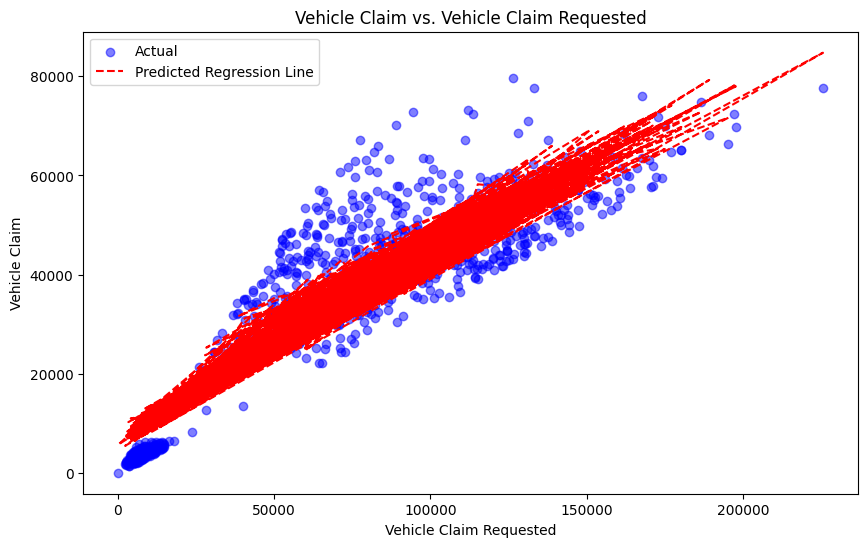

In [152]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the data from CSV files
X = pd.read_csv('X_label.csv')
y = pd.read_csv('Y_label.csv')

# Ensure that the target variable y is aligned with X
assert len(X) == len(y), "The number of samples in X and y does not match."

# # Add the target variable to the X DataFrame
# X['vehicle_claim'] = y['vehicle_claim']

# # Prepare feature variables and target variable
# # Remove the target variable from X features
# X_features = X.drop('vehicle_claim', axis=1)
# y_target = y['vehicle_claim']

y_target = y['vehicle_claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)

# Create the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Plot the regression with x-axis being 'vehicle_claim_requested' and y-axis being 'vehicle_claim'
plt.figure(figsize=(10,6))
plt.scatter(X['vehicle_claim_requested'], y['vehicle_claim'], color='blue', alpha=0.5, label='Actual')
plt.plot(X['vehicle_claim_requested'], y_pred, color='red', linestyle='--', label='Predicted Regression Line')
plt.xlabel('Vehicle Claim Requested')
plt.ylabel('Vehicle Claim')
plt.title('Vehicle Claim vs. Vehicle Claim Requested')
plt.legend()
plt.show()

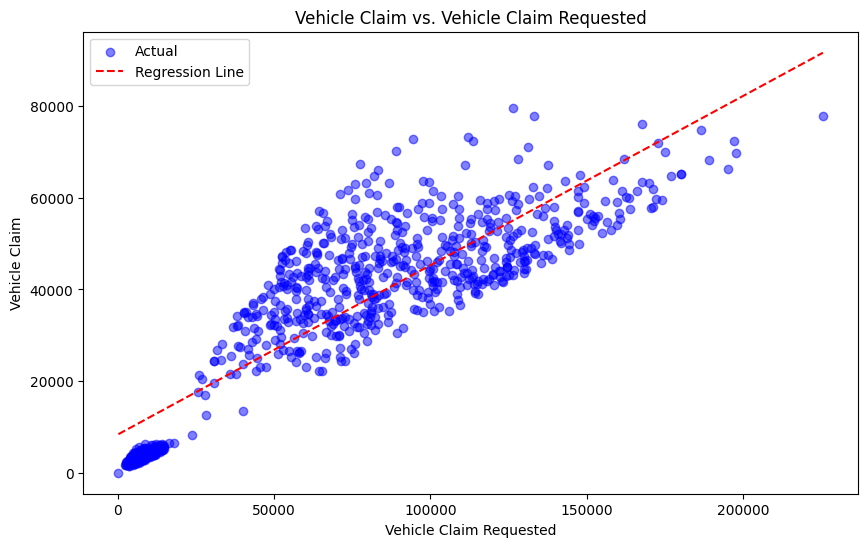

R² Score: 0.7656
Slope: 0.3685
Intercept: 8415.2516


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the data from CSV files
X = pd.read_csv('X_label.csv')
y = pd.read_csv('Y_label.csv')

# Extract just the 'vehicle_claim_requested' feature for simple linear regression
X_feature = X[['vehicle_claim_requested']].values
y_target = y['vehicle_claim'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Sort the values for plotting a smooth line
X_sorted = np.sort(X_feature, axis=0)
y_pred_sorted = model.predict(X_sorted)

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(X_feature, y_target, color='blue', alpha=0.5, label='Actual')
plt.plot(X_sorted, y_pred_sorted, color='red', linestyle='--', label='Regression Line')
plt.xlabel('Vehicle Claim Requested')
plt.ylabel('Vehicle Claim')
plt.title('Vehicle Claim vs. Vehicle Claim Requested')
plt.legend()
plt.show()

# Print model performance metrics
print(f"R² Score: {model.score(X_feature, y_target):.4f}")
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")